# FAKE NEWS DETECTION USING PASSIVE AGGRESSIVE CLASSIFIER

This notebook contains the methodology in the prediction ......

* Importing of Libraries
* Loading Data
* Exploratory Data Analysis
* Feature Extraction
* Data splitting
* Modelling
* Cross validation
* Prediction
* Evaluation

Data was taken from Kaggle https://www.kaggle.com/datasets/jruvika/fake-news-detection

## Importing of libraries

In [1]:
# libraries for data manipulation and exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#other libraries needed for feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

#libraries for data splitting and evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold

#libraries for models
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

## Loading dataset

In [3]:
df = pd.read_csv('data1.csv')

#showing the first 5 rows
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


## Exploratory Data Analysis

In [4]:
#data dimension
df.shape

(4009, 4)

This dataset contains 4009 rows and 4 columns, here we will see the what each column describe.

* `URLs` : URL of the news
* `Headline` : Headline of the news
* `Body` : News description
* `Label` : 0 for fake news and 1 for real news

In [5]:
#statistical summary of data
df.describe(include='all')

,URLs,Headline,Body,Label
count,4009,4009,3988,4009.000000
unique,3352,2831,2863,NaN
top,http://beforeitsnews.com/u-s-politics/2017/10/...,"10/3 Expo Park-Forbes Field Era: Pirates, Gray...",A Potato Battery Can Light up a Room for Over ...,NaN
freq,5,6,143,NaN
mean,NaN,NaN,NaN,0.466949
std,NaN,NaN,NaN,0.498969
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,1.000000


From above it is the `Body`, `URLs` and `Headline` have unique values of 2863,3352 and 2831 respectively. Other statistical representations are `NaN` because these columns are datatype of String

### Target Count

In [6]:
#count of target column 
df.Label.value_counts()

0    2137
1    1872
Name: Label, dtype: int64

c:\users\baba t\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


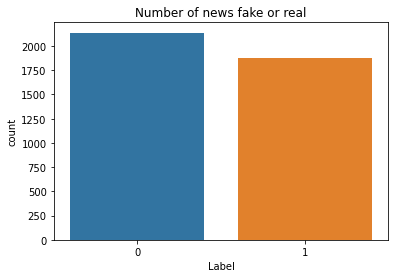

In [7]:
#plot of the target count
sns.countplot(df.Label)
plt.title('Number of news fake or real');

We can see that the dataset is relatively balanced

### Checking for duplicates

In [8]:
#checking for duplicates
df.duplicated().sum()

0

In [9]:
df['Body'].duplicated().sum()

1145

In [10]:
df['URLs'].duplicated().sum()

657

In [11]:
df['Headline'].duplicated().sum()

1178

There are no duplicate records but each fields have duplicates. This might be as a result of bloggers copying news but only changing the Headline.

### Checking for missing values

In [12]:
#checking for null values in data
df.isnull().sum()

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

Only the `Body` column contains missing values. Due to the limited amount of data we have, we will fill in the missing values with empty string *("")* to avoid losing information.

In [13]:
#filling missing value with ""
df['Body'] = df['Body'].fillna('')

In [14]:
#verifying for missing values
df.isnull().sum()

URLs        0
Headline    0
Body        0
Label       0
dtype: int64

## Feature Extraction

In [15]:
#generating new feature
df['News'] = df['Headline']+df['Body']

#drop features that are not needed
features_dropped = ['URLs','Headline','Body']
df = df.drop(features_dropped, axis =1)

In [16]:
df.head()

,Label,News
0,1,Four ways Bob Corker skewered Donald TrumpImag...
1,1,Linklater's war veteran comedy speaks to moder...
2,1,Trump’s Fight With Corker Jeopardizes His Legi...
3,1,Egypt's Cheiron wins tie-up with Pemex for Mex...
4,1,Jason Aldean opens 'SNL' with Vegas tributeCou...


## Data Splitting

#### Define X and y

In [17]:
X= df['News']
y= df['Label']

In [18]:
X

0       Four ways Bob Corker skewered Donald TrumpImag...
1       Linklater's war veteran comedy speaks to moder...
2       Trump’s Fight With Corker Jeopardizes His Legi...
3       Egypt's Cheiron wins tie-up with Pemex for Mex...
4       Jason Aldean opens 'SNL' with Vegas tributeCou...
                              ...                        
4004    Trends to WatchTrends to Watch\n% of readers t...
4005    Trump Jr. Is Soon To Give A 30-Minute Speech F...
4006          Ron Paul on Trump, Anarchism & the AltRight
4007    China to accept overseas trial data in bid to ...
4008    Vice President Mike Pence Leaves NFL Game Beca...
Name: News, Length: 4009, dtype: object

In [19]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4004    0
4005    0
4006    0
4007    1
4008    0
Name: Label, Length: 4009, dtype: int64

# Splitting the dataset into the Training set and Test set in 70-30 ratio

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [21]:
#feature encoding
#this is a continuation of feature extraction
tfvect = TfidfVectorizer(stop_words='english',max_df=0.9)
tfid_X_train = tfvect.fit_transform(X_train)
tfid_X_test = tfvect.transform(X_test)

## Modelling

### PassiveAggressive Classifier

In [22]:
#initialising the model
PA_classifier = PassiveAggressiveClassifier(max_iter=50)
 #max_iter =50 The maximum number of iterations the model makes over the training data.
#fitting the data
PA_classifier.fit(tfid_X_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

### Prediction

In [23]:
#predictiing test data
y_pred = PA_classifier.predict(tfid_X_test)

### Evaluation

In [24]:
#checking model accuracy
PA_classifier_acc = accuracy_score(y_test,y_pred)
print(f'Passive Aggressive Classifier Accuracy: {PA_classifier_acc*100:.2f}%')

Passive Aggressive Classifier Accuracy: 98.50%


#### Confusion matrix

The Confusion Matrix displays the
* `True Positive`: True News that is Predicited to be True
* `True Negative`: True News, Predicted as False
* `False Positive`: False News that is Predicted to be True
* `False Negative`: False News, Predicted as False

In [25]:
#creating a confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[650,  10],
       [  8, 535]], dtype=int64)

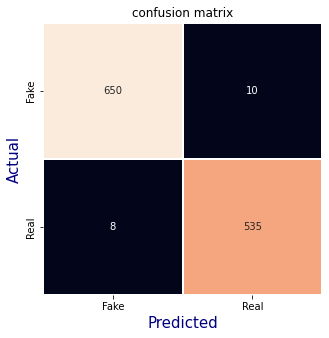

In [26]:
# plotting graph for confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='', cbar=False, linewidths=2,
            xticklabels = ['Fake','Real'], yticklabels = ['Fake','Real'])
plt.title('confusion matrix')
plt.xlabel('Predicted', color='navy', fontsize=15)
plt.ylabel('Actual', color='navy', fontsize=15);


### SVM (Support Vector Machine)  Classifier

In [27]:
#initialising classifier
classifier3 = SVC()

#Fitting training set to the model
classifier3.fit(tfid_X_train,y_train)

#Predicting the test set results based on the model
svm_y_pred = classifier3.predict(tfid_X_test)

#Calculate the accuracy score of this model
svm_acc = accuracy_score(y_test,svm_y_pred)
print(f'Accuracy of SVM model is: {round(svm_acc*100,2)}%')

Accuracy of SVM model is: 97.92%


In [28]:
df3 = confusion_matrix(y_test,svm_y_pred)
print(df3)

[[640  20]
 [  5 538]]


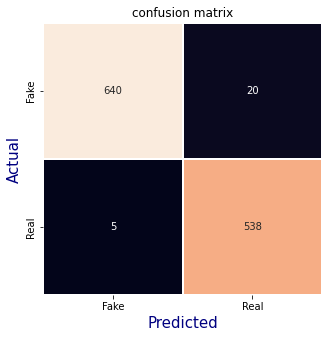

In [29]:
# plotting graph for confusion matrix
cm = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='', cbar=False, linewidths=2,
            xticklabels = ['Fake','Real'], yticklabels = ['Fake','Real'])
plt.title('confusion matrix')
plt.xlabel('Predicted', color='navy', fontsize=15)
plt.ylabel('Actual', color='navy', fontsize=15);


### Multinomial Naive Bayes Classifier

In [30]:
classifier4 = MultinomialNB()
classifier4.fit(tfid_X_train, y_train)
prediction = classifier4.predict(tfid_X_test) 
Multinomial_Naive_Bayes_accuracy = accuracy_score(y_test, prediction)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


accuracy: 94.35%


In [31]:
df4 = confusion_matrix(y_test,prediction)
print(df4)

[[606  54]
 [ 14 529]]


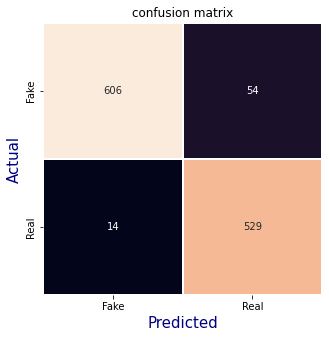

In [32]:
# plotting graph for confusion matrix
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='', cbar=False, linewidths=2,
            xticklabels = ['Fake','Real'], yticklabels = ['Fake','Real'])

plt.title('confusion matrix')
plt.xlabel('Predicted', color='navy', fontsize=15)
plt.ylabel('Actual', color='navy', fontsize=15);

## Comparing Models

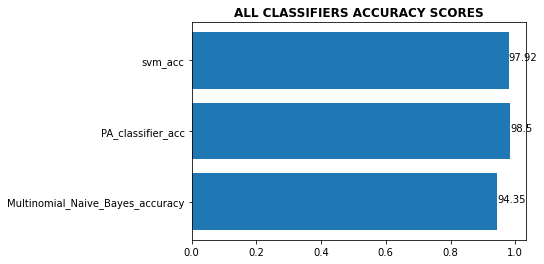

In [33]:
#plotting a barplot to show classifiers performance

x = ["Multinomial_Naive_Bayes_accuracy", "PA_classifier_acc", "svm_acc", ]

y =  [Multinomial_Naive_Bayes_accuracy, PA_classifier_acc, svm_acc]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, round(value * 100,2))
    plt.title('ALL CLASSIFIERS ACCURACY SCORES', fontweight = 'bold')


AS PASSIVE AGGRESIVE CLASSIFIER IS ABLE TO PROVIDE THE BEST RESULTS - PASSIVE AGGRESIVE WILL BE USED TO CHECK THE NEWS LIBILITITES

In [34]:
#a function to predict news using trained classifier
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = PA_classifier.predict(vectorized_input_data)
    print(prediction)
    if prediction == 1:
        print("This is a Real News")
    else:
        print("This is a Fake News")

In [35]:
fake_news_det("""Go to Article
Upgrading to a Modern Mac""")

[0]
This is a Fake News


In [36]:
fake_news_det(""""Brendan Steele has won three PGA Tour titles
Safeway Open final leaderboard -15 B Steele (US); -13 T Finau (US); -12 P Mickelson (US), C Hadley (US); -11 G DeLaet (Can), T Duncan (US); -10 A Landry (US); B Cauley (US) Selected others: -7 M Laird (Sco); -3 B Davis (Eng)
American Brendan Steele finished with a three-under-par 69 to win the Safeway Open for the second year in succession.
The 34-year-old, who began the final round in Napa two shots off the lead, had five birdies in the first 14 holes and beat compatriot Tony Finau by two strokes despite bogeys at 16 and 18.
Compatriot Tyler Duncan, who led going into the final day, had six bogeys in a three-over 75 to finish in joint fifth.
Phil Mickelson finished alongside Chesson Hadley in joint third.
Scot Martin Laird was the highest-placed Briton, finishing joint 17th on seven under""")

[1]
This is a Real News


In [37]:
df['News'][1]

'Linklater\'s war veteran comedy speaks to modern America, says starLONDON (Reuters) - “Last Flag Flying”, a comedy-drama about Vietnam war veterans, will resonate with Trump’s America, despite, or perhaps because of, its period setting, actor Bryan Cranston said on Sunday after a screening at the London Film Festival.\nSet in the United States in December 2003 – when U.S. forces in Iraq were dragging Saddam Hussein out of a “spider hole” - it is the story of three ageing former servicemen who reunite to bury the son of one of them who has been killed in action.\nWith President Donald Trump saying he could “totally destroy” North Korea and characterizing a dinner with military commanders as “the calm before the storm”, Cranston said “Last Flag Flying” was a timely reminder of the effect on normal Americans of ill-advised military campaigns.\n“I think it has a lot of relevance today in the sense that (today) it’s not clear cut as far as the (what are the) intentions of the government or

# Detection of fake news

In [38]:
#saving trained model
import pickle
pickle.dump(PA_classifier,open('model.pkl', 'wb'))

In [39]:
loaded_model = pickle.load(open('model.pkl', 'rb'))
loaded_model

PassiveAggressiveClassifier(max_iter=50)

In [40]:
def detector_news(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    print(prediction)
    if prediction == 1:
        print("This is a Real News")
    else:
        print("This is a Fake News")

In [41]:
detector_news(""""Late-night television hosts did not hold back on Hollywood mogul Harvey Weinstein after he was fired by his film company in light of accusations of sexual harassment.

 """)

[1]
This is a Real News


In [42]:
detector_news("JetNation FanDuel League; Week 4 of readers think this story is Fact. Add your two cents.(Before Its News)Our FanDuel league is back again this week. Here are the details:$900 in total prize money. $250 to the winner. $10 to enter.Remember this is a one week league, pick your lineup against the salary cap and next week if you want to play again you can pick a completely different lineup if you want.Click this link to enter — http://fanduel.com/JetNation You can discuss this with other NY Jets fans on the Jet Nation message board. Or visit of on Facebook.Source: http://www.jetnation.com/2017/09/27/jetnation-fanduel-league-week-4/")

[0]
This is a Fake News


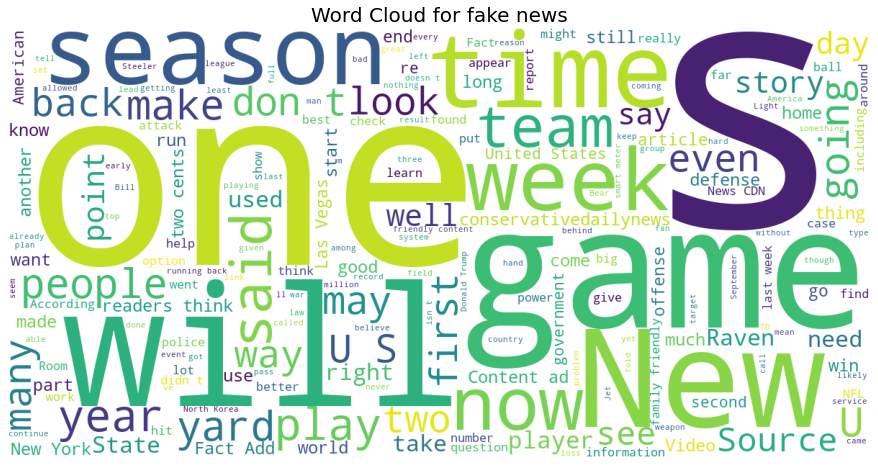

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
sw = set(STOPWORDS)

fake_news = df[df.Label == 0]
real_news = df[df.Label == 1]

# wordcloud for fake news
fake_wc = WordCloud(width = 1200, height = 600, 
                    background_color ='white', 
                    stopwords = sw, 
                    min_font_size = 10).generate(' '.join(fake_news.News)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 6), facecolor = None) 
plt.imshow(fake_wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word Cloud for fake news', fontsize=20);

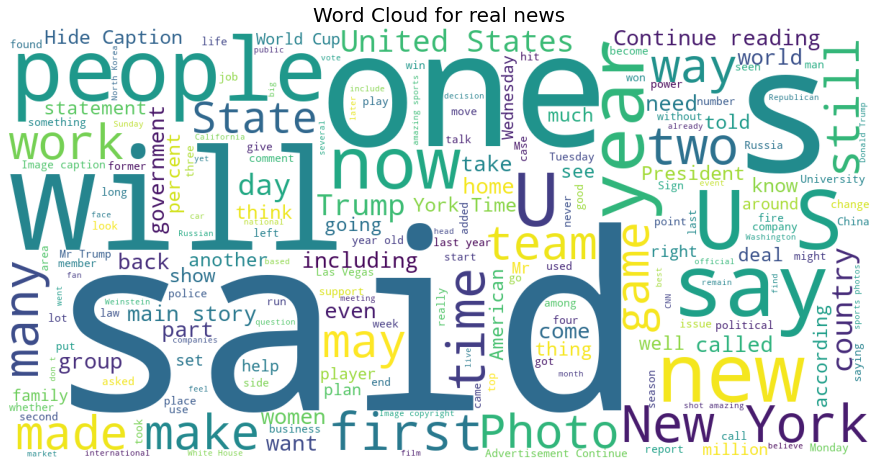

In [44]:
# wordcloud for real news
real_wc = WordCloud(width = 1200, height = 600, 
                    background_color ='white', 
                    stopwords = sw, 
                    min_font_size = 10).generate(' '.join(real_news.News)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 6), facecolor = None) 
plt.imshow(real_wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word Cloud for real news', fontsize=20);

From my observation on the word cloud there are lot of real and fake news about 'United States'

## Cross Validation using KFold

# IN THIS SECTION I APPLIED KFOLD WITH THE TFIDFVECTORIZER

## SVM

Using same `X` and `y`

In [45]:
from sklearn.model_selection import KFold

### Setting A Cross Validation

In [46]:
X = df['News']
y = df['Label']

In [47]:
#using a cross validation of 10 folds
folds = 10
cv_kfold = KFold(n_splits= folds, random_state=43, shuffle=True)
#I used a random state = 43 because this is to ensure us of code reproducibility
# and ensure us that every time we run our codes 
#we must be able to get the same output when we run and if we don’t do it we will be getting a different results when we run it.

# svm_model 
svm_clf = SVC()

acc_scores = []
count = 1
for train_index, test_index in cv_kfold.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
   #vectorising the split 
    tfidf = TfidfVectorizer()
    x_train = tfidf.fit_transform(x_train)
    x_test = tfidf.transform(x_test)

    #training fold
    svm_clf.fit(x_train, y_train)
    y_pred = svm_clf.predict(x_test)
    
    #fold accuracy
    score = accuracy_score(y_test, y_pred)
    acc_scores.append(score)
    
    print(f"Fold {count}: Accuracy score {score*100 :.2f}%")
    print("==============================================")
    count+=1

Fold 1: Accuracy score 99.25%
Fold 2: Accuracy score 98.75%
Fold 3: Accuracy score 97.51%
Fold 4: Accuracy score 97.76%
Fold 5: Accuracy score 99.00%
Fold 6: Accuracy score 99.00%
Fold 7: Accuracy score 99.00%
Fold 8: Accuracy score 99.00%
Fold 9: Accuracy score 98.75%
Fold 10: Accuracy score 98.75%


In [48]:
print(f"SVM mean accuracy score for the 10 folds is {np.mean(acc_scores) * 100 :.2f}%")

SVM mean accuracy score for the 10 folds is 98.68%


SVM mean accuracy score for the 10 folds is 98.68%

### Visualising Last Fold Prediction¶

In [49]:
def confusion_matrix_plot(model_name, pred):
    # plotting graph for confusion matrix
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='', cbar=False, linewidths=2,
            xticklabels = ['Fake','Real'], yticklabels = ['Fake','Real'])
    plt.title(f'{model_name} confusion matrix')
    plt.xlabel('Predicted', color='navy', fontsize=15)
    plt.ylabel('Actual', color='navy', fontsize=15);

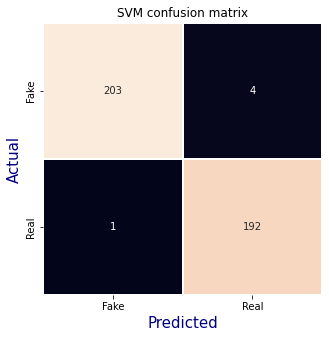

In [50]:
confusion_matrix_plot("SVM", y_pred)

## Multinomial Naive Bayes¶

In [51]:
#using a cross validation of 10 folds
folds = 10
cv_kfold = KFold(n_splits= folds, random_state=43, shuffle=True)

# MNB_model 
MNB_clf = MultinomialNB()

MNB_acc_scores = []
count = 1
for train_index, test_index in cv_kfold.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
   #vectorising the split 
    tfidf = TfidfVectorizer()
    x_train = tfidf.fit_transform(x_train)
    x_test = tfidf.transform(x_test)

    #training fold
    MNB_clf.fit(x_train, y_train)
    MNB_y_pred = MNB_clf.predict(x_test)
    
    #fold accuracy
    score = accuracy_score(y_test, MNB_y_pred)
    MNB_acc_scores.append(score)
    
    print(f"Fold {count}: Accuracy score {score*100 :.2f}%")
    print("==============================================")
    count+=1

Fold 1: Accuracy score 94.51%
Fold 2: Accuracy score 94.01%
Fold 3: Accuracy score 94.01%
Fold 4: Accuracy score 91.52%
Fold 5: Accuracy score 95.26%
Fold 6: Accuracy score 93.27%
Fold 7: Accuracy score 93.77%
Fold 8: Accuracy score 94.01%
Fold 9: Accuracy score 94.26%
Fold 10: Accuracy score 96.75%


In [52]:
print(f"Multinomial mean accuracy score for the 10 folds is {np.mean(MNB_acc_scores) * 100 :.2f}%")

Multinomial mean accuracy score for the 10 folds is 94.14%


### Visualising Last Fold Prediction

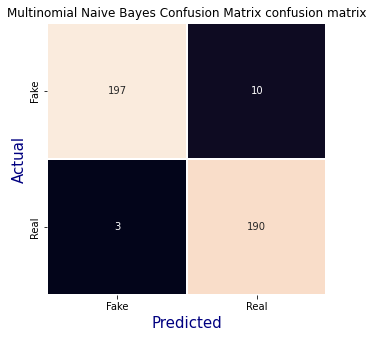

In [53]:
confusion_matrix_plot("Multinomial Naive Bayes Confusion Matrix", MNB_y_pred)

## Passive Aggresive for Kfold

In [54]:
from sklearn.metrics import accuracy_score
#using a cross validation of 10 folds
folds = 10
cv_kfold = KFold(n_splits= folds, random_state=43, shuffle=True)

# PAC_model 
classifier = PassiveAggressiveClassifier(max_iter=50)
PAC_acc_scores = []
count = 1
for train_index, test_index in cv_kfold.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
   #vectorising the split 
    tfidf = TfidfVectorizer()
    x_train = tfidf.fit_transform(x_train)
    x_test = tfidf.transform(x_test)

    #training fold
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    
    #fold accuracy
    score = accuracy_score(y_test, y_pred)
    PAC_acc_scores.append(score)
    
    print(f"Fold {count}: Accuracy score {score*100 :.2f}%")
    print("==============================================")
    count+=1

Fold 1: Accuracy score 99.00%
Fold 2: Accuracy score 99.00%
Fold 3: Accuracy score 97.76%
Fold 4: Accuracy score 98.75%
Fold 5: Accuracy score 99.25%
Fold 6: Accuracy score 99.50%
Fold 7: Accuracy score 99.00%
Fold 8: Accuracy score 99.50%
Fold 9: Accuracy score 99.25%
Fold 10: Accuracy score 99.00%


In [55]:
print(f"PASSIVE AGGRESIVE CLASSIFIER mean accuracy score for the 10 folds is {np.mean(PAC_acc_scores) * 100 :.2f}%")

PASSIVE AGGRESIVE CLASSIFIER mean accuracy score for the 10 folds is 99.00%


### Visualising Last Fold Prediction

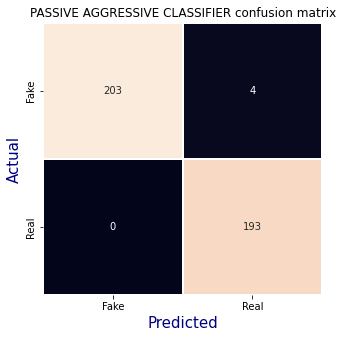

In [56]:
confusion_matrix_plot("PASSIVE AGGRESSIVE CLASSIFIER", y_pred)